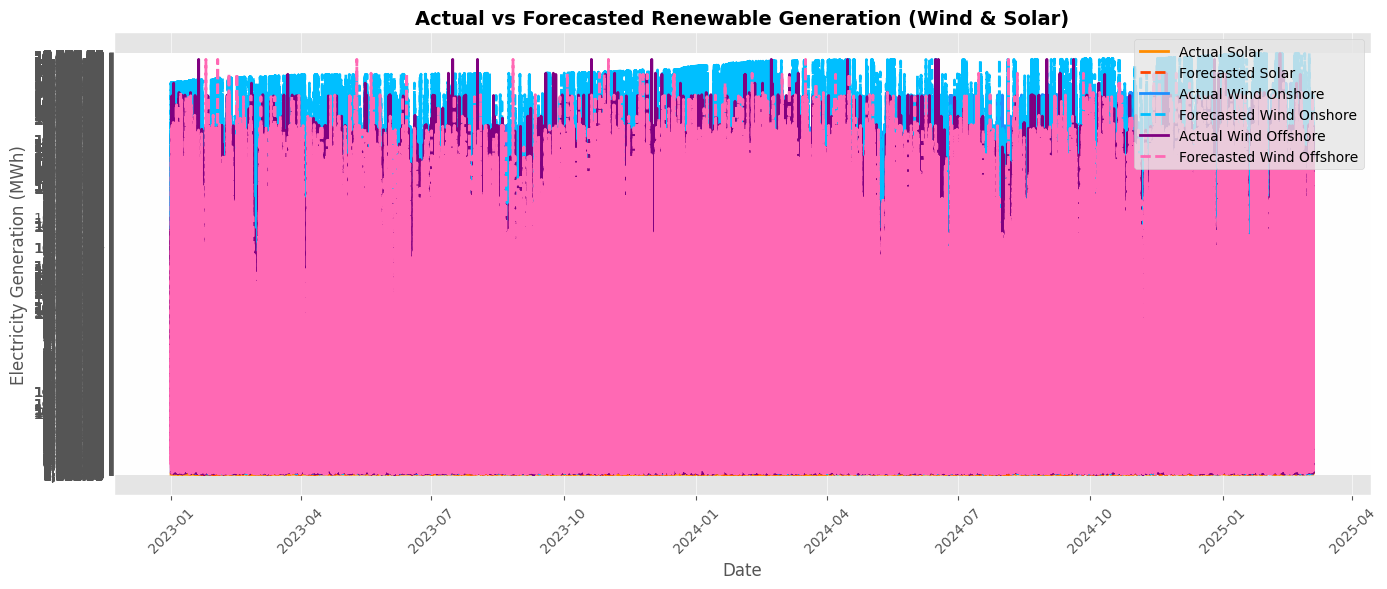

Plot saved: ../plots\actual_vs_forecasted_renewable_generation.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define paths
PLOTS_DIR = "../plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

# Load datasets
actual_gen_file = "../data/refined_files/refined_cleaned_Actual_generation_202301010000_202503050000_Quarterhour.csv"
forecast_gen_file = "../data/refined_files/refined_cleaned_Forecasted_generation_Day-Ahead_202301010000_202503050000_Hour_Quarterhour.csv"

df_actual = pd.read_csv(actual_gen_file, delimiter=",", low_memory=False)
df_forecast = pd.read_csv(forecast_gen_file, delimiter=",", low_memory=False)

# Convert time column to datetime
df_actual["Start date"] = pd.to_datetime(df_actual["Start date"])
df_forecast["Start date"] = pd.to_datetime(df_forecast["Start date"])

# Select relevant columns
actual_columns = [
    "Start date",
    "Photovoltaics [MWh] Original resolutions",
    "Wind offshore [MWh] Original resolutions",
    "Wind onshore [MWh] Original resolutions"
]

forecast_columns = [
    "Start date",
    "Photovoltaics [MWh] Original resolutions",
    "Wind offshore [MWh] Original resolutions",
    "Wind onshore [MWh] Original resolutions",
    "Total [MWh] Original resolutions"
]

df_actual = df_actual[actual_columns]
df_forecast = df_forecast[forecast_columns]

# Merge datasets on Start date
df_merged = df_actual.merge(df_forecast, on="Start date", suffixes=("_actual", "_forecast"))

# Apply seaborn style
plt.style.use("ggplot")

# Plot Actual vs Forecasted Generation (Wind + Solar)
plt.figure(figsize=(14, 6))

plt.plot(df_merged["Start date"], df_merged["Photovoltaics [MWh] Original resolutions_actual"], label="Actual Solar", color="#FF8C00", linewidth=2)
plt.plot(df_merged["Start date"], df_merged["Photovoltaics [MWh] Original resolutions_forecast"], label="Forecasted Solar", linestyle="dashed", color="#FF4500", linewidth=2)

plt.plot(df_merged["Start date"], df_merged["Wind onshore [MWh] Original resolutions_actual"], label="Actual Wind Onshore", color="#1E90FF", linewidth=2)
plt.plot(df_merged["Start date"], df_merged["Wind onshore [MWh] Original resolutions_forecast"], label="Forecasted Wind Onshore", linestyle="dashed", color="#00BFFF", linewidth=2)

plt.plot(df_merged["Start date"], df_merged["Wind offshore [MWh] Original resolutions_actual"], label="Actual Wind Offshore", color="#800080", linewidth=2)
plt.plot(df_merged["Start date"], df_merged["Wind offshore [MWh] Original resolutions_forecast"], label="Forecasted Wind Offshore", linestyle="dashed", color="#FF69B4", linewidth=2)

# Refining plot elements
plt.xlabel("Date", fontsize=12)
plt.ylabel("Electricity Generation (MWh)", fontsize=12)
plt.title("Actual vs Forecasted Renewable Generation (Wind & Solar)", fontsize=14, fontweight="bold")
plt.legend(fontsize=10, loc="upper right")
plt.grid(alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Save refined figure with an improved filename
plot_filename = "actual_vs_forecasted_renewable_generation.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Plot saved: {os.path.join(PLOTS_DIR, plot_filename)}")
